## Bike Sharing Assignment

### Problem Statement

A `bike-sharing system` is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a `dock` which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

**The company wants to know:**

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:

Required to model the demand for shared bikes with the available `independent variables`. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In the dataset provided, you will notice that there are three columns named `casual'`, `'registered'`, and `'cnt'`. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this `cnt' as the target variable.`

**Steps Involved**

- Reading,Understanding and Visualising the data
- Preparing the data for modelling (train-test-split, rescaling etc)
- Training the model/Build Model Using Automated + Manual Approach
- Residual Analysis
- Predictions and Evaluation of test set

### Step 1: Reading, Understanding and Visualisation of Data

In [185]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [186]:
# reading dataset
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [187]:
# getting statistical info about the dataset
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [188]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [189]:
day.shape

(730, 16)

`From the above we learned that we have 730 rows and 16 columns with no null values in any columns. We have total of 15 columns with numeric values and date is set as object so we need to convert it to date type.`

In [190]:
day['dteday']=pd.to_datetime(day['dteday'])
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [191]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

**Lets Visualize the data**

In [192]:
print(list(day.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


**Dropping columns - casual,registered as they are similar to cnt and we would be considering cnt as target variable.
Also dropping-instant, dteday as instant is row indentifier and date will not repeat**

In [193]:
bike_sharing=day.drop(['casual','registered','instant','dteday'],axis=1)

In [194]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [195]:
# replacing the values to make the data more logical to read
bike_sharing.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)
bike_sharing.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep'
                                             ,10:'oct',11:'nov',12:'dec'},inplace=True)
bike_sharing.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thr',5:'Fri',6:'Sat'},inplace=True)
bike_sharing.weathersit.replace({1:'Good',2:'Moderate',3:'Bad',4:'Severe'},inplace=True)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,Moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thr,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Good,9.305237,11.46350,43.6957,12.522300,1600


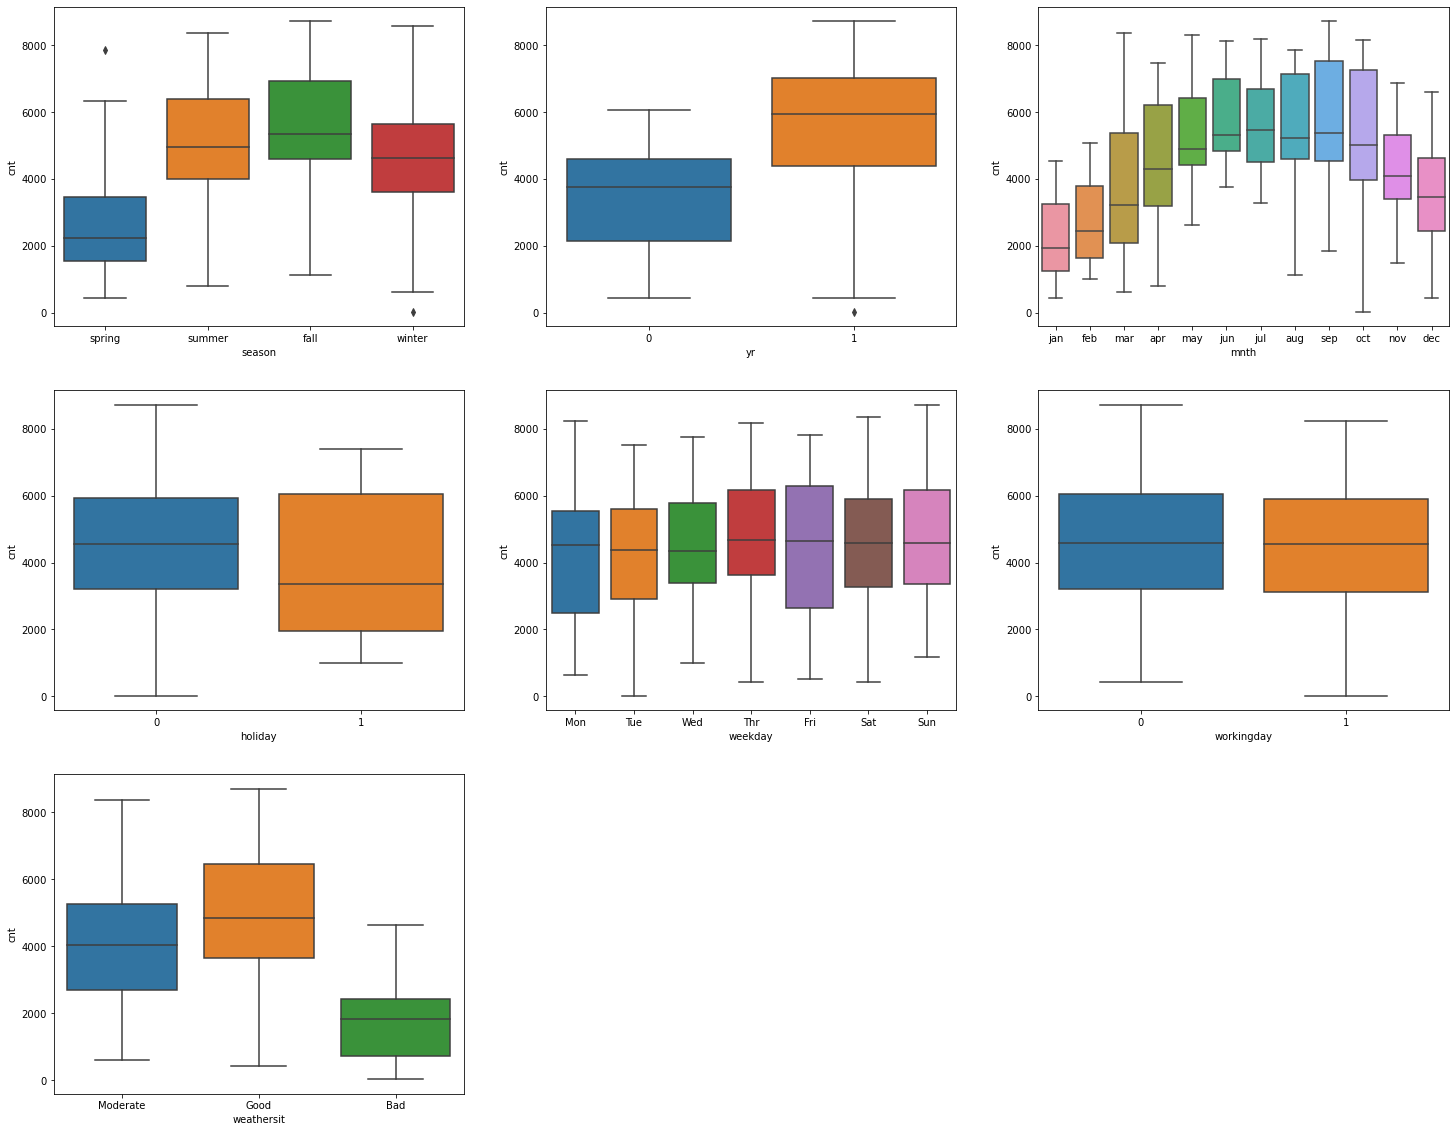

In [196]:
#boxplot for categorical variables
car_list=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
plt.figure(figsize=[25,20])
plt.subplot(3,3,1)
sns.boxplot(x=car_list[0],y='cnt',data=bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x=car_list[1],y='cnt',data=bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x=car_list[2],y='cnt',data=bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x=car_list[3],y='cnt',data=bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x=car_list[4],y='cnt',data=bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x=car_list[5],y='cnt',data=bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x=car_list[6],y='cnt',data=bike_sharing)
plt.show()

**Insights drawn from above boxplot**
- We can see no much difference in the count of bike sharing during weekday to weekend, the median is almost same for all days of week
- But we see the count difference in the weather situation and see the count increases when the it is good followed by modearate climate
- We can also observe the count has increased in 2019 with respect with 2018
- There is slight increase in count as well when it is not a holiday

**Few more observations**
- We see decrease in count during spring and start increasing from summer to fall and then gradually decrease in winter
- Starting from october in winter we see the decrease and till May. Rest of the other months have good amount of usage

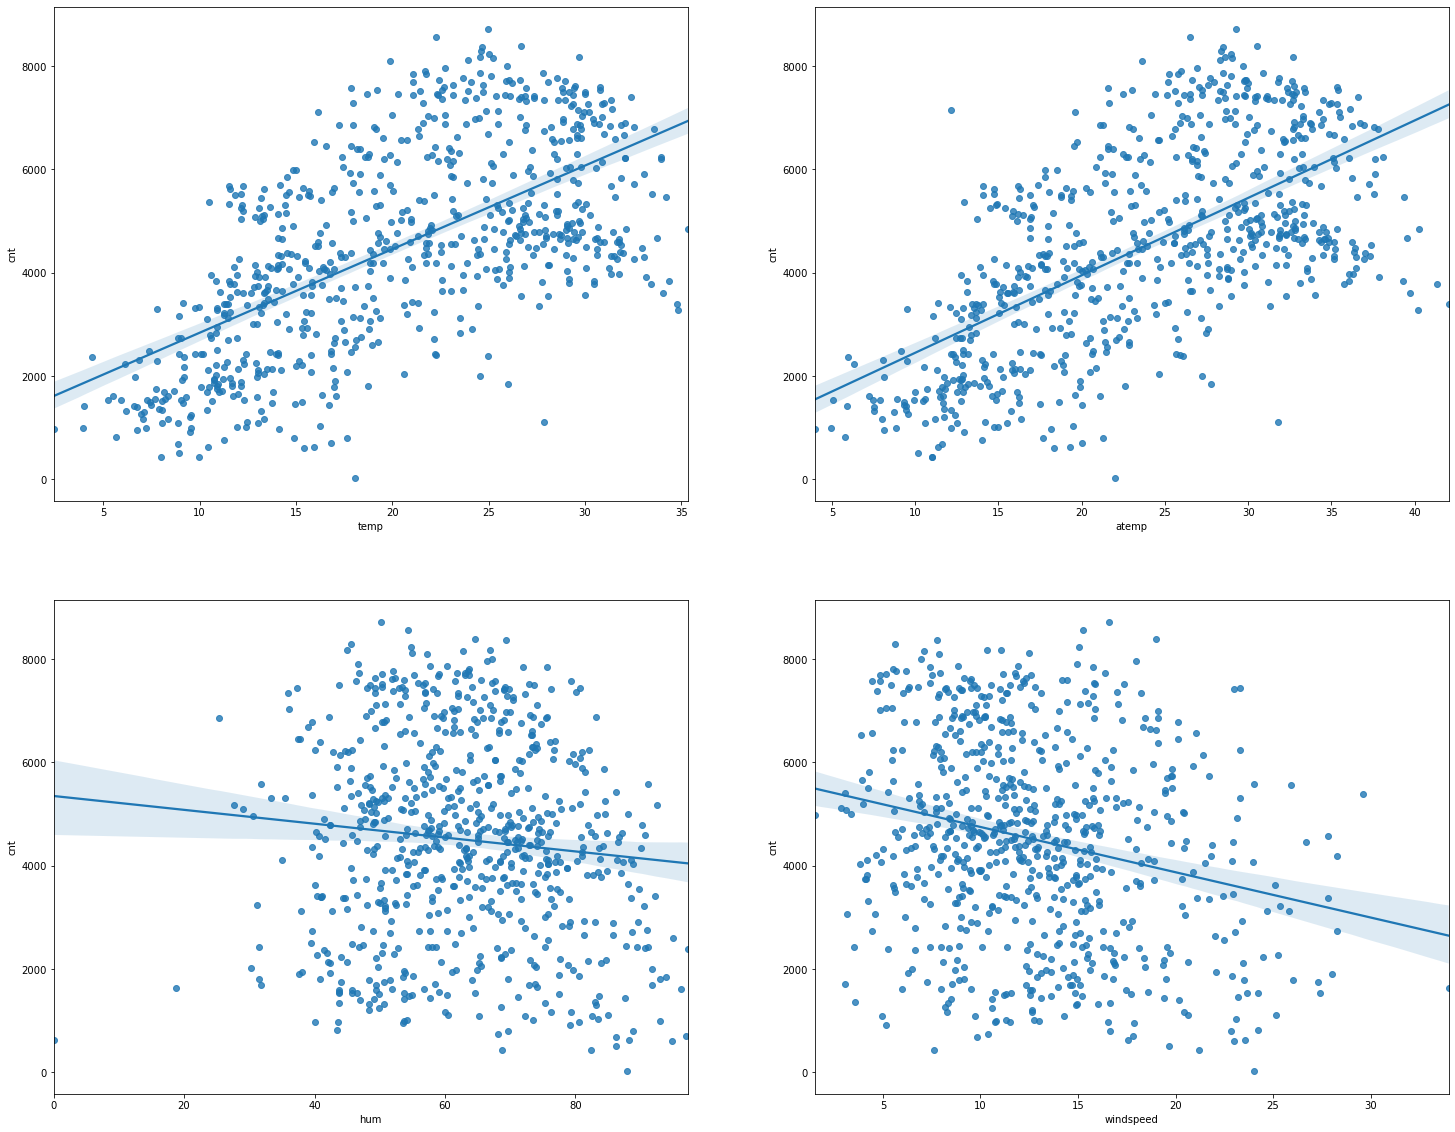

In [197]:
#regplot for numeric variables
var_list=[ 'temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=[25,20])
plt.subplot(2,2,1)
sns.regplot(data=bike_sharing,x=var_list[0],y='cnt')
plt.subplot(2,2,2)
sns.regplot(data=bike_sharing,x=var_list[1],y='cnt')
plt.subplot(2,2,3)
sns.regplot(data=bike_sharing,x=var_list[2],y='cnt')
plt.subplot(2,2,4)
sns.regplot(data=bike_sharing,x=var_list[3],y='cnt')
plt.show()

**Insights Drawn:**
- As the windspeed increases , the count decrease, hence windspeed as inversely related
- With increase in humidity ,we see gradual decrease in number as well , hence it is inversely related as well
- We see the same graph for temp and atemp and it is directly related to count.

<Figure size 1080x2160 with 0 Axes>

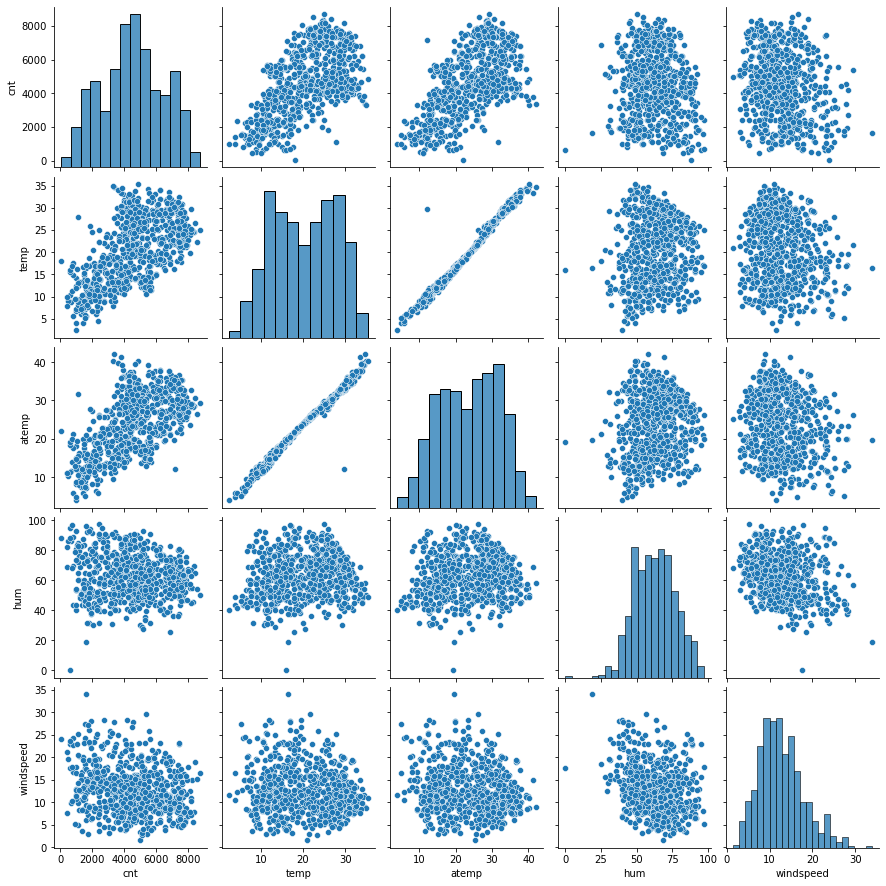

In [198]:
#pairplot
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [199]:
#Lets drop atemp as it is creating multi-collinearilty
bike_sharing.drop(['atemp'],inplace=True,axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,Mon,1,Moderate,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Moderate,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Good,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,Thr,1,Good,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Good,9.305237,43.6957,12.522300,1600


In [200]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Step 2: Preparing the data for modelling (train-test-split, rescaling etc)

In [201]:
# Lets start with data preparation by creating dummies
season = pd.get_dummies(bike_sharing['season'])
season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [202]:
mnth=pd.get_dummies(bike_sharing['mnth'])
mnth.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [203]:
weekdy=pd.get_dummies(bike_sharing['weekday'])
weekdy.head()

,Fri,Mon,Sat,Sun,Thr,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [204]:
weather=pd.get_dummies(bike_sharing['weathersit'])
weather.head()

,Bad,Good,Moderate
0,0,0,1
1,0,0,1
2,0,1,0
3,0,1,0
4,0,1,0


In [205]:
bike_sharing=pd.concat([bike_sharing,season],axis=1)
bike_sharing=pd.concat([bike_sharing,mnth],axis=1)
bike_sharing=pd.concat([bike_sharing,weekdy],axis=1)
bike_sharing=pd.concat([bike_sharing,weather],axis=1)
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Fri,Mon,Sat,Sun,Thr,Tue,Wed,Bad,Good,Moderate
0,spring,0,jan,0,Mon,1,Moderate,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,jan,0,Tue,1,Moderate,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,jan,0,Wed,1,Good,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,0,1,0
3,spring,0,jan,0,Thr,1,Good,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,0,1,0
4,spring,0,jan,0,Fri,1,Good,9.305237,43.6957,12.522300,...,1,0,0,0,0,0,0,0,1,0


In [206]:
bike_sharing.drop(['season', 'mnth', 'weekday', 'weathersit'],axis=1,inplace=True)
bike_sharing.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,Fri,Mon,Sat,Sun,Thr,Tue,Wed,Bad,Good,Moderate
0,0,0,1,14.110847,80.5833,10.749882,985,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [207]:
bike_sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'fall', 'spring', 'summer', 'winter', 'apr', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'Fri', 'Mon', 'Sat',
       'Sun', 'Thr', 'Tue', 'Wed', 'Bad', 'Good', 'Moderate'],
      dtype='object')

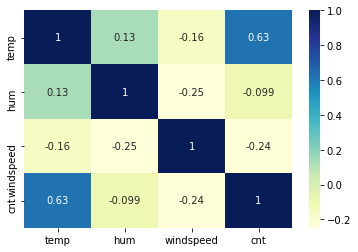

In [208]:
#heatmap
sns.heatmap(bike_sharing[['temp','hum','windspeed','cnt']].corr(), cmap='YlGnBu', annot = True)
plt.show()

**Splitting the Data into Training and Testing Sets**

In [209]:
df_train,df_test=train_test_split(bike_sharing,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 33)
(220, 33)


**Rescaling the data using MinMaxScalar**

In [210]:
#Rescaling the numeric variables only as all the others are already between 0 and 1

#list for scaling
vars=['temp', 'hum', 'windspeed', 'cnt']

#object created
scalar=MinMaxScaler()

#fit the data
df_train[vars]=scalar.fit_transform(df_train[vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,Fri,Mon,Sat,Sun,Thr,Tue,Wed,Bad,Good,Moderate
576,1,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [211]:
df_train[vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


**after scaling we can see all the numeric variables has fitted into the range of min-0 and max-1**

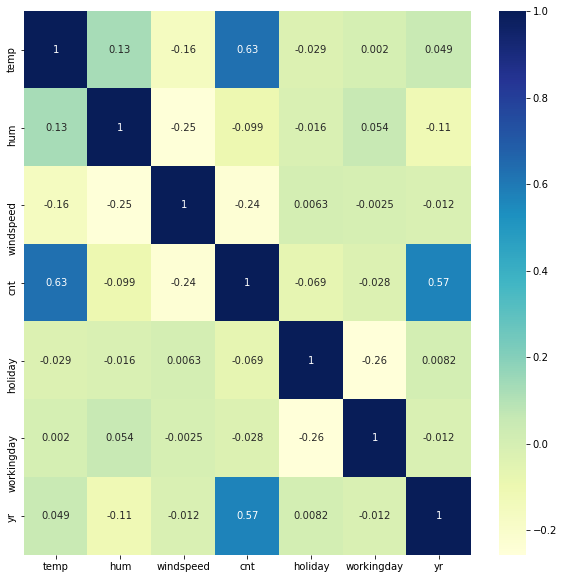

In [212]:
plt.figure(figsize=[10,10])
sns.heatmap(bike_sharing[['temp','hum','windspeed','cnt','holiday','workingday','yr']].corr(), cmap='YlGnBu', annot = True)
plt.show()

### Step 3: Training the model/Build Model Using Automated + Manual Approach

In [213]:
# Divide data into X and y
y_train=df_train.pop('cnt')
X_train=df_train

**Automated approach using RFE**

In [214]:
#using automated approach to get the top 15 features 

# Build a Lienar Regression model using SKLearn for RFE
lm =LinearRegression()
lm.fit(X_train , y_train)

#Cut down number of features to 18 using automated approach
rfe=RFE(lm,18)
rfe = rfe.fit(X_train,y_train)

In [215]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('apr', False, 13),
 ('aug', False, 8),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', False, 12),
 ('may', False, 4),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('Fri', False, 6),
 ('Mon', False, 15),
 ('Sat', False, 2),
 ('Sun', False, 3),
 ('Thr', False, 5),
 ('Tue', False, 14),
 ('Wed', False, 9),
 ('Bad', True, 1),
 ('Good', True, 1),
 ('Moderate', True, 1)]

In [216]:
#Columns Included
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'Bad',
       'Good', 'Moderate'],
      dtype='object')

In [217]:
#Columns not included
X_train.columns[~rfe.support_]

Index(['summer', 'apr', 'aug', 'jun', 'mar', 'may', 'oct', 'Fri', 'Mon', 'Sat',
       'Sun', 'Thr', 'Tue', 'Wed'],
      dtype='object')

In [218]:
## Defining function to build OLS model and calculate the VFE ##

In [219]:
def OLS_func(col):
    X_train_rfe= sm.add_constant(X_train[col])
    lm = sm.OLS(y_train,X_train_rfe).fit()
    print(lm.summary())
    return lm

In [220]:
def vfe_func(col):
    vif = pd.DataFrame()
    X = X_train[col]
    vif['Features']= X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print(vif)

## Manual Elimination

### Model 1: 

In [221]:
col=['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'Bad',
       'Good', 'Moderate']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.39e-188
Time:                        17:05:17   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2102      0.027      7.764      0.0

<AxesSubplot:>

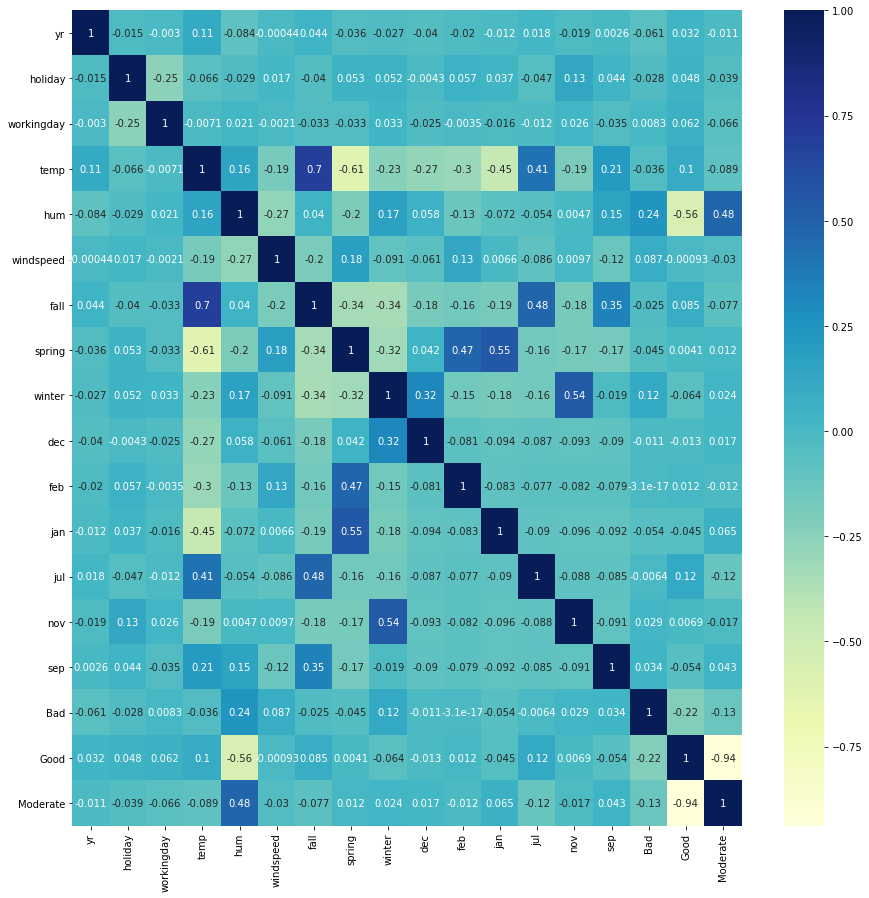

In [222]:
plt.figure(figsize=[15,15])
sns.heatmap(df_train[col].corr(),annot=True,cmap='YlGnBu')

### Model 2

In [223]:
# removing working day
col=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'Bad',
       'Good', 'Moderate']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.94e-188
Time:                        17:05:18   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2021      0.027      7.517      0.0

### Model 3

In [224]:
# eliminating feb due to high p value
col=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'Bad',
       'Good', 'Moderate']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          8.15e-189
Time:                        17:05:18   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1963      0.027      7.353      0.0

### Model 4: 

In [225]:
#eliminating dec
col=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'jan', 'jul', 'nov', 'sep', 'Bad',
       'Good', 'Moderate']

OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          4.41e-189
Time:                        17:05:18   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1901      0.027      7.145      0.0

### Model 5: 

In [226]:
# eliminating nov
col=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'jan', 'jul', 'sep', 'Bad',
       'Good', 'Moderate']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Sun, 08 May 2022   Prob (F-statistic):          7.59e-190
Time:                        17:05:18   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1870      0.027      7.049      0.0

### Model 6: 

In [227]:
#eliminating jan
col=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'jul', 'sep', 'Bad',
       'Good', 'Moderate']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.95e-190
Time:                        17:05:18   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1810      0.026      6.853      0.0

### Model 7: 

In [228]:
#eliminating Moderate
col=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'fall',
       'spring', 'winter', 'jul', 'sep', 'Bad',
       'Good']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.95e-190
Time:                        17:05:19   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2852      0.035      8.170      0.0

### Model 8:

In [229]:
# eliminating humidity
col=['yr', 'holiday', 'temp', 'windspeed', 'fall',
       'spring', 'winter', 'jul', 'sep', 'Bad',
       'Good']
OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 08 May 2022   Prob (F-statistic):          5.06e-187
Time:                        17:05:19   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1658      0.024      7.025      0.0

### Model 9: 

In [230]:
# eliminating winter
col=['yr', 'holiday', 'temp', 'windspeed', 'fall',
       'spring', 'jul', 'sep', 'Bad',
       'Good']

OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.5
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.36e-186
Time:                        17:05:19   Log-Likelihood:                 494.92
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     499   BIC:                            -921.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2030      0.020     10.408      0.0

### Model 10: 

In [231]:
#eliminating july
col=['yr', 'holiday', 'temp', 'windspeed', 'fall',
       'spring', 'sep', 'Bad',
       'Good']

OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.06e-186
Time:                        17:05:19   Log-Likelihood:                 491.59
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2080      0.020     10.661      0.0

### Model 11: 

In [232]:
# eliminating windspeed
col=['yr', 'holiday', 'temp', 'fall',
       'spring', 'sep', 'Bad',
       'Good']

OLS_func(col)
vfe_func(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     280.1
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.74e-179
Time:                        17:05:19   Log-Likelihood:                 472.36
No. Observations:                 510   AIC:                            -926.7
Df Residuals:                     501   BIC:                            -888.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1579      0.018      8.555      0.0

### Model 12: 

In [233]:
# eliminating fall
col=['yr', 'holiday', 'temp', 'spring', 'sep', 'Good','Bad']

X_train_sm = X_train[col]
# add constant
X_train_sm= sm.add_constant(X_train_sm)
# create model
lr = sm.OLS(y_train, X_train_sm)
# fit the model
lr_model = lr.fit()
#summary
print(lr_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     306.3
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.13e-176
Time:                        17:05:19   Log-Likelihood:                 462.78
No. Observations:                 510   AIC:                            -909.6
Df Residuals:                     502   BIC:                            -875.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1945      0.017     11.601      0.0

In [234]:
X_train_new=X_train[col]
vif = pd.DataFrame()
X = X_train_new
vif['Features']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,temp,3.40
5,Good,2.69
0,yr,2.00
3,spring,1.25
4,sep,1.15
6,Bad,1.06
1,holiday,1.03


## At this point our model looks good - with R2 value of 0.810 and adjusted R square .808 and very low p-value and VIF values<5 for all features

We will select `Model 12` as our final model as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

<AxesSubplot:>

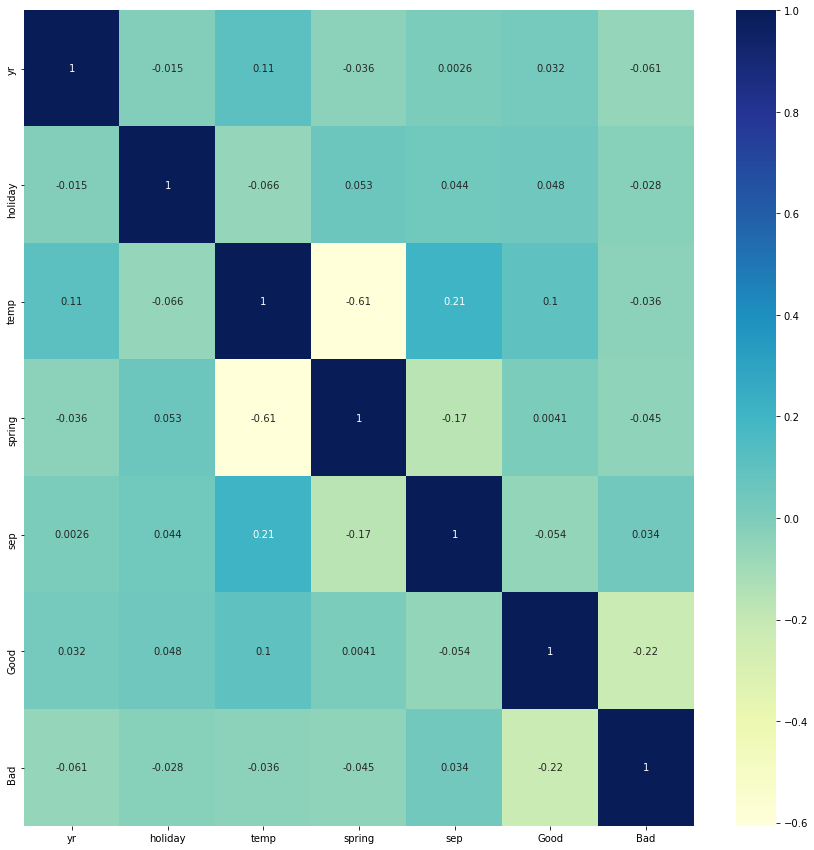

In [235]:
plt.figure(figsize=[15,15])
sns.heatmap(df_train[col].corr(),annot=True,cmap='YlGnBu')

### Step 4: Residual Analysis

In [236]:
col

['yr', 'holiday', 'temp', 'spring', 'sep', 'Good', 'Bad']

In [237]:
y_train_pred= lr_model.predict(X_train_sm)
y_train_pred

576    0.798205
426    0.431158
728    0.437187
482    0.571526
111    0.318189
         ...   
578    0.815664
53     0.186481
350    0.283271
79     0.359986
520    0.644705
Length: 510, dtype: float64

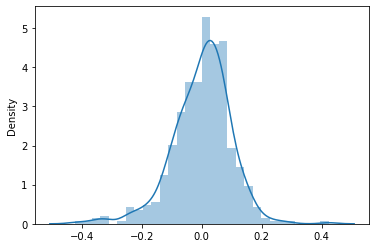

In [238]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

**The graph got in residual analysis is centered at 0, so we can say that it is normally distributed as well**

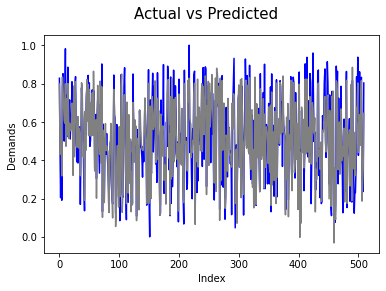

In [239]:
c = [i for i in range(0,len(X_train_sm),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="gray")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

**We observe that the predicted value is able to cover the actual value graph**

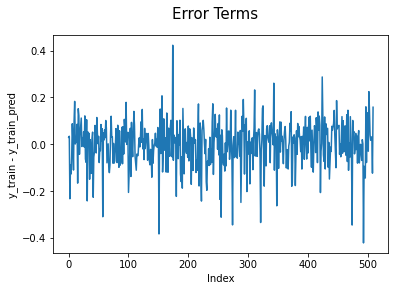

In [240]:
c = [i for i in range(0,len(X_train_sm),1)]
plt.plot(c,res)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train - y_train_pred')
plt.show()

**We see no pattern in the error and seems to be independent of each other**

In [241]:
r2_score(y_train,y_train_pred)

0.8102961978067424

## Step 5: Predictions and Evaluation of test set

In [242]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,Fri,Mon,Sat,Sun,Thr,Tue,Wed,Bad,Good,Moderate
184,0,1,0,29.793347,63.7917,5.459106,6043,1,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,1,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,1,0,0,...,1,0,0,0,0,0,0,0,1,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [243]:
num_list=['temp', 'hum', 'windspeed', 'cnt']
df_test[num_list]= scalar.transform(df_test[num_list])
df_test

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,Fri,Mon,Sat,Sun,Thr,Tue,Wed,Bad,Good,Moderate
184,0,1,0,0.831783,0.657364,0.084219,0.692706,1,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,1,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,1,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.756118,0.283397,0.757478,0,0,0,...,0,0,0,0,0,0,1,0,1,0
127,0,0,1,0.584649,0.650923,0.069510,0.495973,0,0,1,...,0,0,0,0,0,1,0,0,1,0
640,1,0,1,0.745598,0.817947,0.052115,0.868615,0,0,0,...,0,0,0,0,1,0,0,0,0,1
72,0,0,1,0.331557,0.512107,0.203418,0.232858,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [244]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,fall,spring,summer,...,Fri,Mon,Sat,Sun,Thr,Tue,Wed,Bad,Good,Moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.245455,0.254545,0.263636,...,0.131818,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.654545,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.431338,0.436599,0.441609,...,0.339064,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**we have fit the values on train and transform it on test so the min max value considered from the training set hence the min max in testis not exactly 0 and 1**

**Divide X and y for test set**

In [245]:
y_test = df_test.pop('cnt')
X_test=df_test

In [246]:
# Same columns as Train model
X_test=X_test[col]
X_test.head()

,yr,holiday,temp,spring,sep,Good,Bad
184,0,1,0.831783,0,0,0,0
535,1,0,0.901354,0,0,1,0
299,0,0,0.511964,0,0,0,0
221,0,0,0.881625,0,0,1,0
152,0,0,0.817246,0,0,1,0


In [247]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,spring,sep,Good,Bad
184,1.0,0,1,0.831783,0,0,0,0
535,1.0,1,0,0.901354,0,0,1,0
299,1.0,0,0,0.511964,0,0,0,0
221,1.0,0,0,0.881625,0,0,1,0
152,1.0,0,0,0.817246,0,0,1,0


In [248]:
X_test_sm.shape

(220, 8)

In [249]:
## Predict
y_test_pred = lr_model.predict(X_test_sm)

In [250]:
# calculate R2_score
r2_score(y_test,y_test_pred)

0.8009640985538995

**R2 Score for test data came out to be 80.0% and the R2 score for train data was 81.0%**

### We can see that the equation of our best fitted line is:
$cnt=0.1945 + yr * 0.2355 + temp * 0.3577 - holiday * 0.0921 - spring * 0.1571 - Bad * 0.2161 + sep * 0.0764 + Good * 0.0766 $

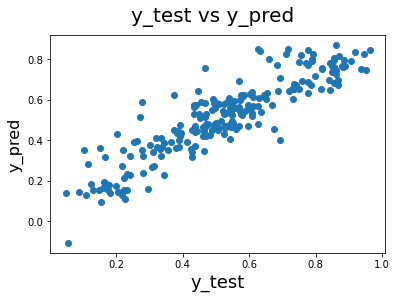

In [251]:
# Plotting graph
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

## Conclusion

Factors affecting the demand for these shared bikes in the American market are: 

Lets answer the below questions:
 
- Which variables are significant in predicting the demand for shared bikes.
        1. Temperature
        2. Holiday
        3. Spring Season
        4. Bad Weathersit (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
        5. September Month
        6. Good Weathersit (Clear, Few clouds, Partly cloudy, Partly cloudy)
        7. Year

𝑐𝑛𝑡=0.1945+𝑦𝑟∗0.2355+𝑡𝑒𝑚𝑝∗0.3577−ℎ𝑜𝑙𝑖𝑑𝑎𝑦∗0.0921−𝑠𝑝𝑟𝑖𝑛𝑔∗0.1571−𝐵𝑎𝑑∗0.2161+𝑠𝑒𝑝∗0.0764+𝐺𝑜𝑜𝑑∗0.0766

- How well those variables describe the bike demands
        1. We see temperature is directly co-related to the count of the bikes with beta value of 0.3577
        2. We also the holiday is inversely co -related to the count of the bikes with beta value in negative -0.0921
        3. We see the count of bikes more in 2019 as compare to 2018 so seems the demand is getting increased (0.2355)
        4. We see the demand of bikes is more in summer and fall than compare to spring (negative in spring -0.1571)
        5. Specifically in the month of September we see high relation (0.0764)
        6. And finally when the weather condition are good. i.e. Clear we see higher count of shared bike. (0.0766)
        7. We also observed that when the weather condition are bad there iss drop in count of bikes (-0.2161)
        
        
 Company should focus on Spring to raise the demand as we see less demand during the spring.